# Data Visulization: Orbital Paths

### Introduction  

For this tutorial, we will use Python to solve the differential equations that govern the orbit of the Earth around the Sun and the visulaize the path of Earth's orbit in several different manners.

Due to the fact that the Sun is almost a million
times more massive than the Earth, we will model the Earth/Sun orbital system as having the Sun's
position fixed at origin and treat Earth's position, velocity, and acceleration as being unknown vector-valued functions of `t`:    
* $ p(t) = (p_x(t), p_y(t)) $
* $ v(t) = (v_x(t), v_y(t)) $
* $ a(t) = (a_x(t), a_y(t)) $

Basic calculus allows us to relate these functions via simple differential equations. In particular, the Earth's velocity `v(t)` is the derivative of the Earth's position `p(t)` with respect to `t`. Likewise, the Earth's acceleration is the derivative of the Earth's velocity with respect to . In vector
equation form. 
* $ \frac{d}{dt}p(t) = v(t) $
* $ \frac{d}{dt}v(t) = a(t) $

Our task is to use these differential equations and Newton physics to derive a complete set of equations suitable for solution.

#### Initial value problems


Earth's position and velocity can be grouped together to form a vector-valued function e(t):
* $ e(t) = (p_x(t), p_y(t), v_x(t), v_y(t)) $  

If $ \frac{d}{dt}e(t) $ represent the derivation of each of these functions with respect to `t`, the goal is to derive a set of 4 first-order equations of the form
* $ \frac{d}{dt}e(t) = h(t, e(t)) $  

where `h(t, e(t))` is a vector-valued function that depends `t` on and the components of e(t). Givena set of equations of this form and initial values for `e(t)` at some time **t = t<sub>0</sub>** , the resulting **initial value problem** has a unique solution that is easy to computer using standard numerical algorithms.

The first two components of `h(t, e(t))` follow directly from the fact that $ \frac{d}{dt}p(t) = v(t) $. To complete the derivation of the required first-order differential equation, we will relate the Earth's acceleration `a(t)` to its position `p(t)` using Newtonian physics.

Newton's law of gravity states that the attractive force between two celestial bodies is proportional to the product of the masses of the two bodies divided by the square of the distance between the two bodies. The constant of proportionality `G` is known as the gravitational constant.

If the Sun has a mass **m<sub>s</sub>** and the Earth has a mass **m<sub>e</sub>**, then the force of the Sun's gravity acting on the Earth has magnitude
* $ \frac{Gm_s m_e}{r^2(t)} $

where `r(t)` is distance from the Earth to the Sun at time `t`. Given that a unit vector from the Earth to the Sun has the form $ -\frac{p(t)}{r(t)} $, the gravitational force `f(t)` acting on the Earth at time `t` can be written in
vector form as 
* $ f(t) = -\frac{Gm_s m_e}{r^3(t)}p(t) $

From Newton's second law, we know $ f(t) = m_e a(t) $. Combining these equations relates Earth's acceleration `a(t)` to its position `p(t)` via:
* $ a(t) = -\frac{Gm_s}{r^3(t)}p(t) $

#### Final differential equations

Based on the above derivation, the final set of 4 first-order differential equations in 4 unknown functions that govern Earth's orbit are:
* $ \frac{d}{dt}p(t) = v(t) $
* $ \frac{d}{dt}v(t) = -\frac{Gm_s}{r^3(t)}p(t) $

where the function `r(t)` has the form 
* $ r(t) = (p^2_x(t) + p^2_y(t))^{0.5} $

In [1]:
# import relevant libraries
import math
import numpy as np

from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation

### Part 1. Set up and solve the equations of motion for the Earth orbiting the Sun. 

The 1st part of the tutorial will be to set up and solve the equations of motion for the Earth orbiting the Sun. These equations can be specified as system of first-order differential equations as described above. Given initial conditions for the Earth's position and velocity, the equations form an initial value problem(described above) that can be solved using `odeint()` method in `scipy.integrate` module. https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

To begin with, we define 4 constants: 
* gravitational cosntant
* mass of Sun 
* mass of Earth
*initial postion of Earth.

In [2]:
# Define some constants - units are in kilograms, kilometers, and days
GRAV_CON = 4.981 * 10 ** (-10) 
MASS_SUN = 1.989 * 10 ** 30
MASS_EARTH = 5.977 * 10 ** 24
INIT_EARTH = (1.495979 * 10 ** 8, 0, 0, 2.56721625 * 10 ** 6)
ORBITS = {}    #initalize an empty orbits dictionary that will be used later

The `orbital_eqs` function takes a tuple `e_0` of 4 numbers and a time `t_0`. The tuple `e_0` consists of 4 components that represent the initial (x,y) values for the Earth's position and velocity at time `t_0`.

This function should return a tuple of 4 numbers that approximates the (x,y) values of Earth's velocity and acceleration at time `t_0`. These values are derived from the first order differential eqautions for Earth's orbit. Note that, for these particualr equations, the returned values do not depend on `t_0`.


Our first function of part 1 `orbital_eqs` takes a tuple `e_0` of 4 numbers and a time `t_0`. The tuple `e_0` consists of 4 components that represent the initial (x,y) values for the Earth's position and velocity at time `t_0`.

This function should return a tuple of 4 numbers that approximates the (x,y) values of Earth's velocity and acceleration at time `t_0`. These values are derived from the first order differential eqautions for Earth's orbit. Note that, for these particualr equations, the returned values do not depend on `t_0`.


In [3]:
#########################################################################
#  Solve the orbital equations and plot the resulting orbits

def orbital_eqs(e_0, t_0):
    """
    Input: Tuple e_0 of floats that represent Earth's position (p_x, p_y)
    and velocity (v_x, v_y) at time t_0
    
    Output: Tuple that contains approximation to d(e)/dt,
    computed from the orbital equations
    
    NOTE: The variable t_0 is not used in computing the
    returned value for the orbital equations
    """
    rt = ((((e_0[0])**2) + ((e_0[1]**2)))**0.5)**3  # function r(t) derived abov
    const = -(GRAV_CON*MASS_SUN)/ rt
    
    return (e_0[2], e_0[3], const*e_0[0], const*e_0[1])


The 2nd function `solve_orbital_eqs` equation takes a `numpy` arrary `time_steps` and a float `speed`. This function uses the `odeint()` method to solve the differential quations encoded by `orbital_eqs()`. The initial conditions for this call should be the values in `INIT_EARTH` with the (x, y) velocities called by `speed`. 

The function should return a 2D `numpy` array whose rows are the x and y positions of the x and y positions of the Earth at the various time steps(which is transpose of the order returned by `odeint()`).

In [4]:
def solve_orbital_eqs(time_steps, speed=1.0):
    """
    Input: numpy array time_steps, optional float speed
    that scales the Earth's initial velocity
    
    Output: Returns a 2D numpy array whose rows are the
    x and y position of the Earth's orbit at specified times
    """
    e0 = np.array(INIT_EARTH)
    e0[2:] = e0[2:] * speed
    array = odeint(orbital_eqs, e0, time_steps)
    
    return np.transpose(array[:, :2])

In [5]:
# Compute orbits and save for later
sim_steps = np.linspace(0, 1000, 1001)
ORBITS['075'] = solve_orbital_eqs(sim_steps, 0.75)
ORBITS['100'] = solve_orbital_eqs(sim_steps, 1.00)
ORBITS['125'] = solve_orbital_eqs(sim_steps, 1.25)
ORBITS['150'] = solve_orbital_eqs(sim_steps, 1.50)
ORBITS

{'075': array([[ 1.49597900e+08,  1.49575763e+08,  1.49509357e+08, ...,
          7.18075749e+07,  7.44762143e+07,  7.70982265e+07],
        [ 0.00000000e+00,  1.92531719e+06,  3.85006448e+06, ...,
         -9.02777636e+07, -8.96220082e+07, -8.89101312e+07]]),
 '100': array([[ 1.49597900e+08,  1.49575766e+08,  1.49509370e+08, ...,
          3.46120683e+06,  6.03952705e+06,  8.61603506e+06],
        [ 0.00000000e+00,  2.56708963e+06,  5.13341966e+06, ...,
         -1.48852408e+08, -1.48782556e+08, -1.48668059e+08]]),
 '125': array([[ 1.49597900e+08,  1.49575766e+08,  1.49509384e+08, ...,
         -2.41084602e+08, -2.39528078e+08, -2.37966697e+08],
        [ 0.00000000e+00,  3.20886203e+06,  6.41677490e+06, ...,
         -2.75925979e+08, -2.76135764e+08, -2.76339947e+08]]),
 '150': array([[ 1.49597900e+08,  1.49575768e+08,  1.49509403e+08, ...,
         -1.27267926e+09, -1.27396262e+09, -1.27524579e+09],
        [ 0.00000000e+00,  3.85063448e+06,  7.70013048e+06, ...,
          1.4268970

Our 3rd function `plot_earth_coords` takes an orbit specified as a 2D `numpy` array `time_steps` expressed in terms of daysm and an optional string `title`. 

The function returns a `matplotlib` figure containing a plot of both the x and y cooordinates independently as function of time in a single plot. The resulting plot inculdes an appropriate title, appropriate labels on both axes, a legend that distinguishes the two functions, and regularly-spaced ticks on both axes.

In [6]:
def plot_earth_coords(orbit, time_steps, title="(p_x(t),p_y(t)) plots"):
    """
    Input: Numpy array orbit whose rows are numpy arrays containing x and y positions
    for the Earth orbit for specified times in the numpy array time_steps
    
    Action: Plot both x positions and y positions versus time_steps
    using matplotlib
    """
    
    fig, (ax0, ax1) = plt.subplots(1,2)
    fig.suptitle(title)
    
    ax0.plot(orbit[0, :], time_steps)
    ax0.set(xlabel = 't', ylabel = 'P_x(t)')
    
    ax1.plot(orbit[1, :], time_steps)
    ax1.set(xlabel ='t', ylabel = 'P_y(t)')
    return 

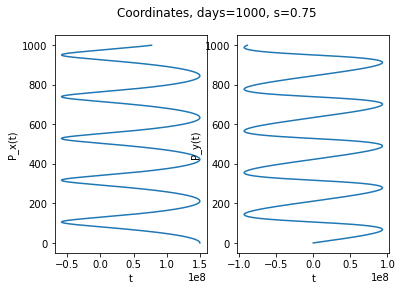

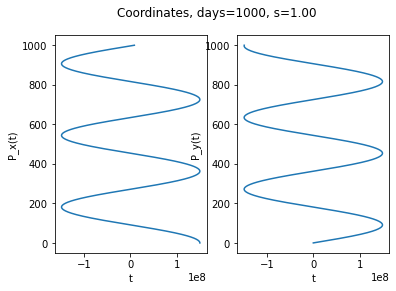

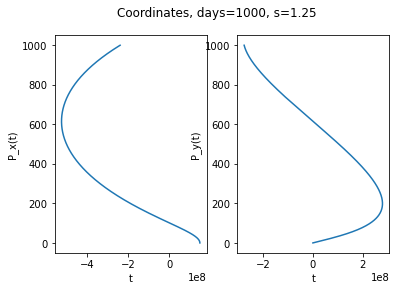

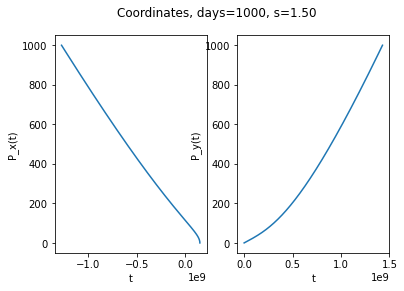

In [7]:
sim_steps = np.linspace(0, 1000, 1001) 
plot_earth_coords(ORBITS["075"], sim_steps, "Coordinates, days=1000, s=0.75")
plot_earth_coords(ORBITS["100"], sim_steps, "Coordinates, days=1000, s=1.00")
plot_earth_coords(ORBITS["125"], sim_steps, "Coordinates, days=1000, s=1.25")
plot_earth_coords(ORBITS["150"], sim_steps, "Coordinates, days=1000, s=1.50")

The final function `test_plot_earth_orbit()` takes an `orbit` specified as a 2D `numpy` array and an optional string `title`. The function returns a `matplotlib` figure containining a plot of the Earth's orbital path as a 2D curve in (x, y) space.

By default, `matplotlib` sets the aspect ratio of the plot to fill a pre-defined rectangle whose shape is based on the golden ratio. This choice distorts the scale of the axes so that the true shape of Earth's orbit is not displayed accurately. Set the aspect ratio of the resulting plot so that the shape of the plot corresponds directly to the data(i.e; Earth's orbit should be a circle when `s=1.0`).

In [8]:
def plot_earth_orbit(orbit, title="Plotted orbit"):
    """
    Input: Numpy array orbit whose rows are numpy arrays containing x and y positions
    for the Earth orbit
    
    Action: Plot x positions versus y positions using matplotlib
    """
    
    fig, axs = plt.subplots()
    fig.suptitle(title)
    plt.gca().set_aspect('equal', adjustable = 'box')
    axs.set(ylabel = 'Earth position Y)', xlabel = 'Earth position X')
#     axs.plot(orbit[0, :], orbit[1, :])
    
    return axs.plot(orbit[0, :], orbit[1, :])

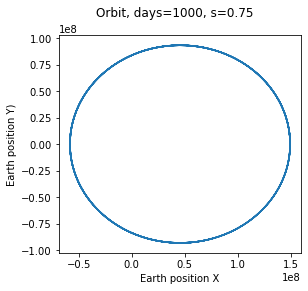

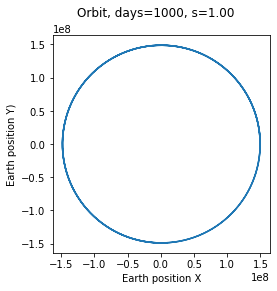

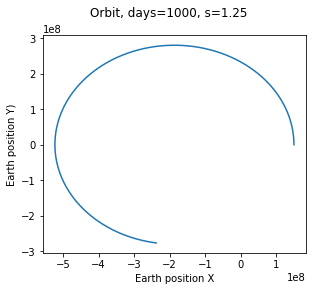

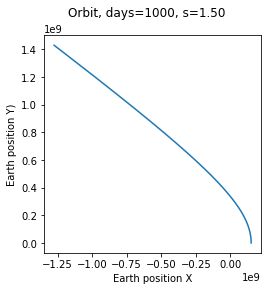

In [9]:
plot_earth_orbit(ORBITS["075"], "Orbit, days=1000, s=0.75")
plot_earth_orbit(ORBITS["100"], "Orbit, days=1000, s=1.00")
plot_earth_orbit(ORBITS["125"], "Orbit, days=1000, s=1.25")
plot_earth_orbit(ORBITS["150"], "Orbit, days=1000, s=1.50")

### Part 2. Animation of orbits

In part 2, we will write a function that creates an animation of these orbits
in `matplotlib`. This animation will include both the Earth, Sun, and part of the orbit. Note that allowing `matplotlib` to automatically determine the plot range for each plot in the animation independently results in a very unnatural animation with a varying plot range. Instead, we will compute a fixed plot range for each plot based on the range of the orbital motion.

The first fucntion `extend_limits(limits, pad=0.1)` takes a tuple `limits` consisting the min and max values for the entire orbit and a float `pad`. The function returns a new tuple for the extended plot ranges where the min and max are both extended by `pad` percent of the entire range. This function will be used to pad the plot range of the animated orbit to avoid the Earth passing near the boundary of the plot.

In [10]:
#########################################################################
# Part 2 - Animate the computed orbits

def extend_limits(limits, pad=0.1):
    """
    Input: Tuple limits = (min_x, max_x, min_y, max_y),
    float pad treated as a percentage

    Output: Tuple of four floats that represent new ranges
    extended by pad (as percentage of range length) in both directions
    """
    x_range = limits[1] - limits[0]
    y_range = limits[3] - limits[2]
    x_range *= pad
    y_range *= pad
    return (limits[0] - x_range, limits[1] + x_range, limits[2] - y_range, limits[3] + y_range)

The 2nd function `animate_earth_orbit(orbit, title="Animated orbit")` takes an `orbit` specified as a 2D `numpy` and an optional string `title`. The function plot an animation of the resulting orbital path using the `FuncAnimation()` method in the `matplotlib.animation module`. 
https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.animation.FuncAnimation.html

In [11]:
def animate_earth_orbit(orbit, title="Animated orbit"):
    """
    Input: Numpy array orbit whose rows are numpy arrays containing x and y positions
    for the Earth orbit
    
    Output: matplotlib Animation object corresponding to
    plot of x positions versus y positions using matplotlib
    """
    sun_radius = 1e7
    
    limits = (orbit[0].min(), orbit[0].max(), orbit[1].min(), orbit[1].max())
    limits = extend_limits(limits)
    
    fig, axs = plt.subplots()
    fig.suptitle(title)
    axs.set_xlim(limits[0], limits[1])
    axs.set_ylim(limits[2], limits[3])
    axs.set(ylabel = 'Earth position Y relative to the Sun (km)', xlabel = 'Earth position X relative to the Sun (km)')
    line, = axs.plot([], [], lw=2)
    sun = plt.Circle((0,0), sun_radius, color='yellow')
    axs.add_patch(sun)
    (line, ) = axs.plot([], [], lw=2, marker='o', markevery=[-1], color = 'b')
    axs.set_aspect('equal')
    def init():
        line.set_data([], [])
        return line,
    
    def animate(i):
        x = orbit[0,:i]
        y = orbit[1,:i]
        line.set_data(x, y)
        line.add_path()
        return line,
    return animation.FuncAnimation(fig, animate, init_func=init,
                               frames=orbit.shape[1], interval=1, blit=True)

### Animated orbit with various velocities

If you are unable to run the code below, click this link https://www.youtube.com/watch?v=jx-57oyhZwk to watch the animation.

Creating animation for speed=0.75


<IPython.core.display.Javascript object>


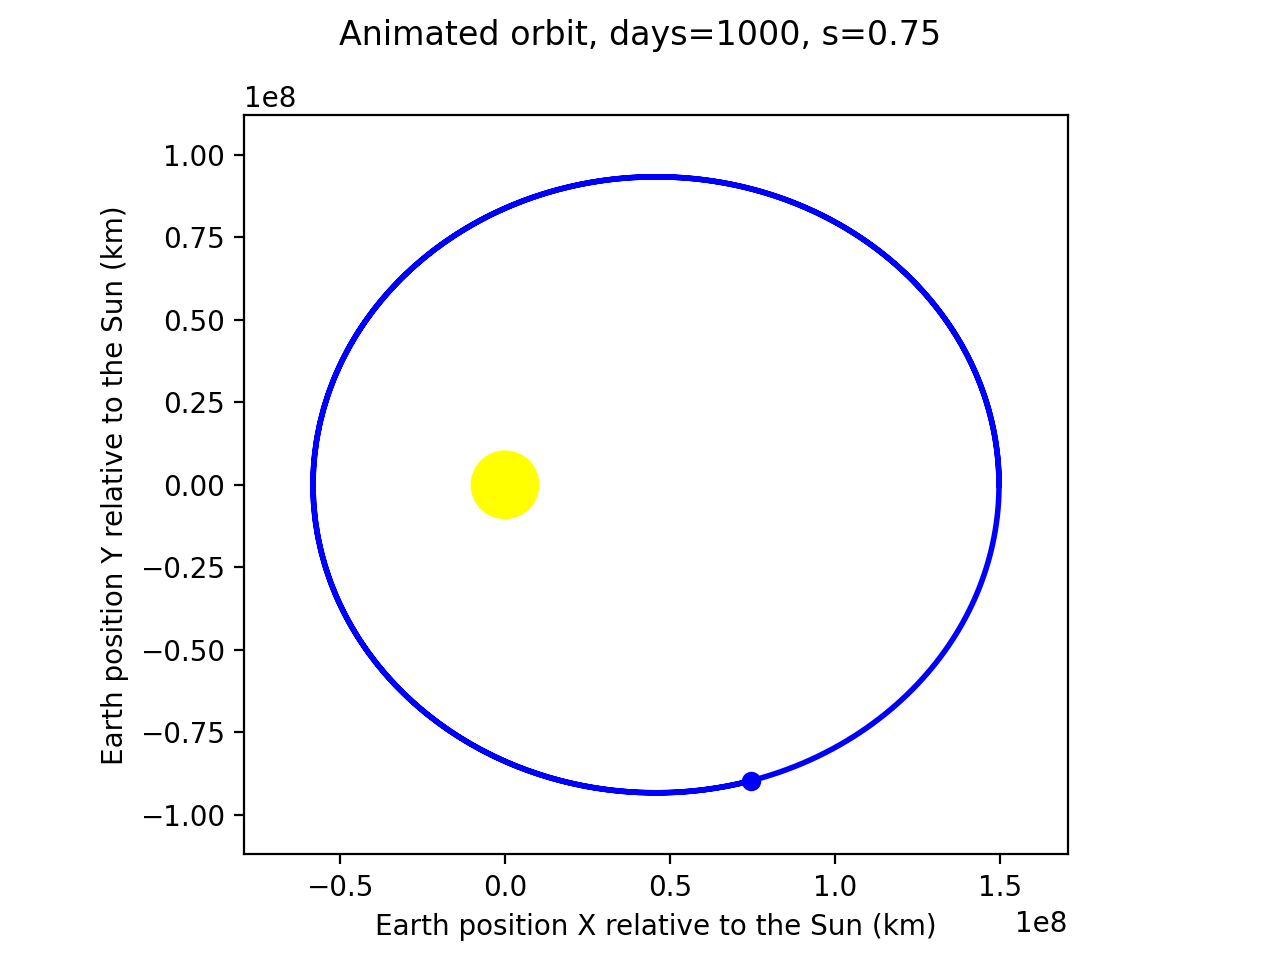

In [12]:
%matplotlib notebook
print("Creating animation for speed=0.75")
handle1 = animate_earth_orbit(ORBITS["075"], "Animated orbit, days=1000, s=0.75")

Creating animation for speed=1.00


<IPython.core.display.Javascript object>


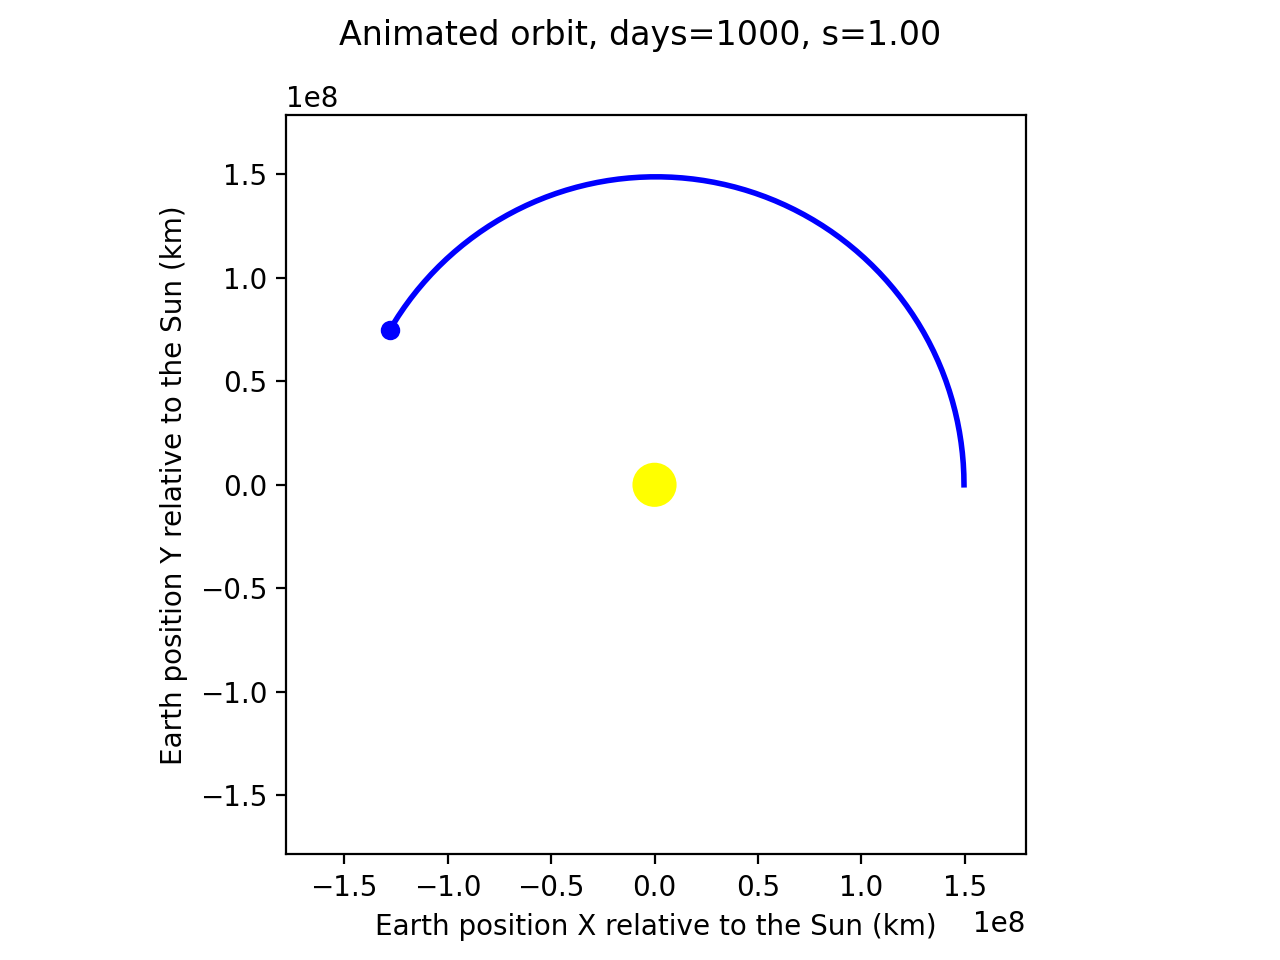

In [13]:
print("Creating animation for speed=1.00")
handle2 = animate_earth_orbit(ORBITS["100"], "Animated orbit, days=1000, s=1.00")

Creating animation for speed=1.25


<IPython.core.display.Javascript object>


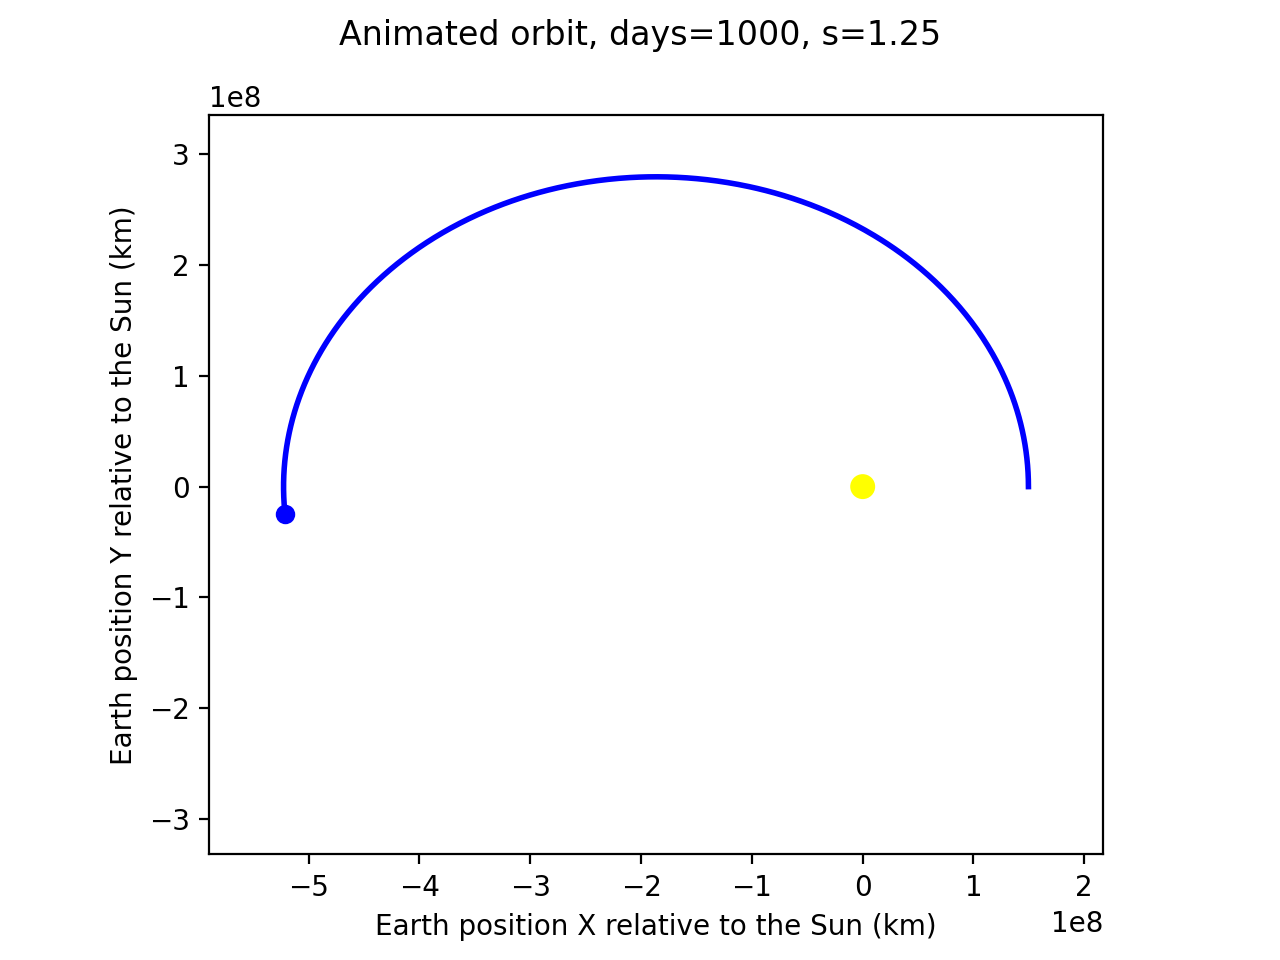

In [14]:
print("Creating animation for speed=1.25")
handle3 = animate_earth_orbit(ORBITS["125"], "Animated orbit, days=1000, s=1.25")

Creating animation for speed=1.50


<IPython.core.display.Javascript object>


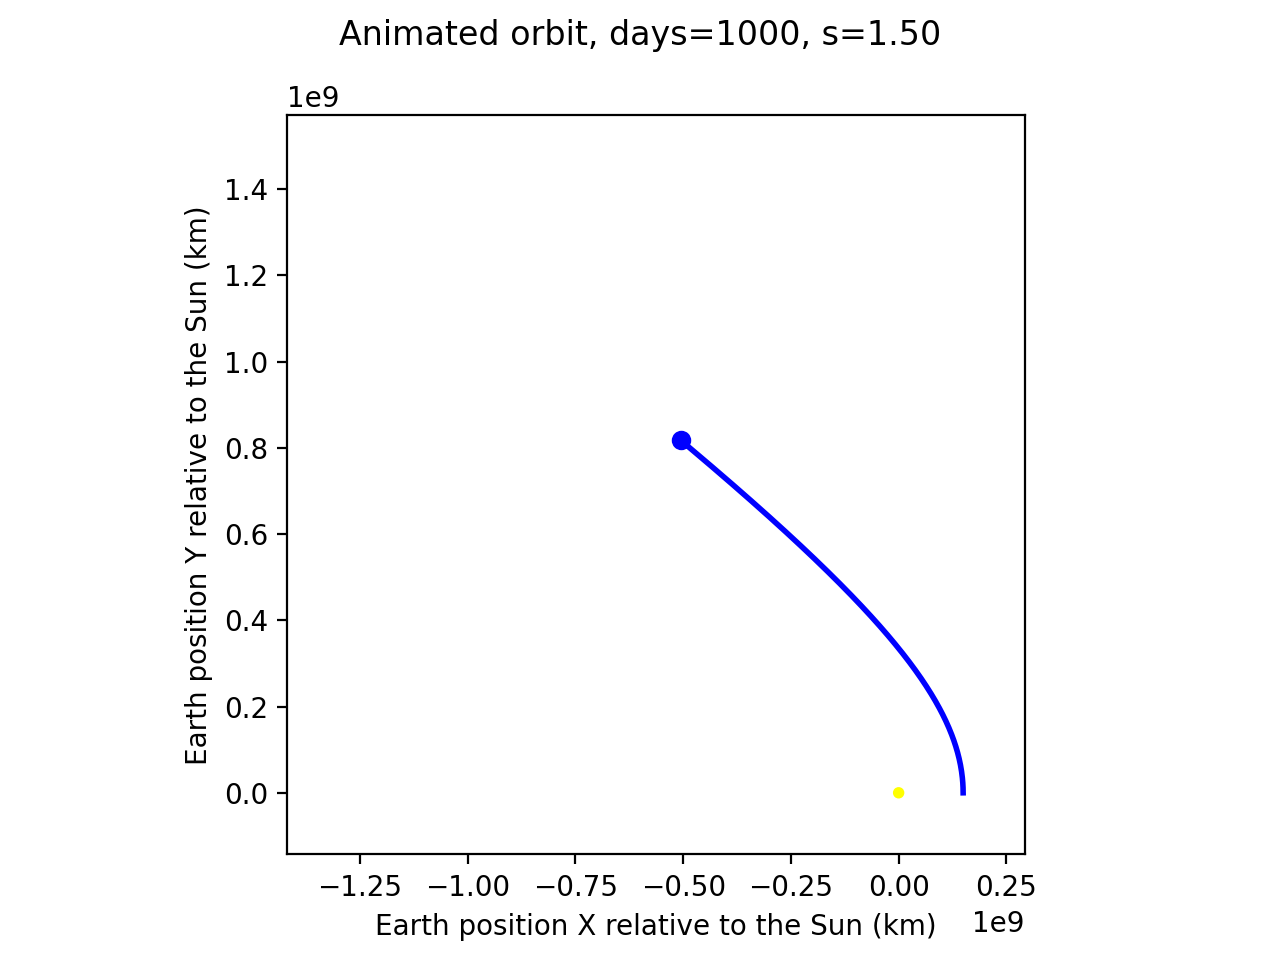

In [15]:
print("Creating animation for speed=1.50")
handle4 = animate_earth_orbit(ORBITS["150"], "Animated orbit, days=1000, s=1.50")

When Earth's trajectory increased by 50%, it shoots past the sun.

### References
1. Initial value problem: https://en.wikipedia.org/wiki/Initial_value_problem
2. scipy.integrate.odeint: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html
3. FuncAnimation: https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.animation.FuncAnimation.html
4. Newton's law: https://en.wikipedia.org/wiki/Newton%27s_laws_of_motion

Thank you for reading! ☺️☺️☺️